<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch workflow
Covered in this notebook:
* Get data ready
* Build or pick a pretrained model
* fit the model
* making predictions(inference) and evaluating
* save and reload

In [310]:
import torch
from torch import nn # contains all building blocks of nn in torch
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### 1. Data (preparing and loading)

-> Get data into numerical representation

-> Build a model to learn model from that numerical representation.

-> Here, lets make a linearly dependant output feature in relation to input feature

In [311]:
w = 0.3
b = 0.5

In [312]:
X = torch.arange(1, 15, 0.25).unsqueeze(dim=1)
Y = w*X + b # actual output

In [313]:
X, Y, X.shape, Y.shape

(tensor([[ 1.0000],
         [ 1.2500],
         [ 1.5000],
         [ 1.7500],
         [ 2.0000],
         [ 2.2500],
         [ 2.5000],
         [ 2.7500],
         [ 3.0000],
         [ 3.2500],
         [ 3.5000],
         [ 3.7500],
         [ 4.0000],
         [ 4.2500],
         [ 4.5000],
         [ 4.7500],
         [ 5.0000],
         [ 5.2500],
         [ 5.5000],
         [ 5.7500],
         [ 6.0000],
         [ 6.2500],
         [ 6.5000],
         [ 6.7500],
         [ 7.0000],
         [ 7.2500],
         [ 7.5000],
         [ 7.7500],
         [ 8.0000],
         [ 8.2500],
         [ 8.5000],
         [ 8.7500],
         [ 9.0000],
         [ 9.2500],
         [ 9.5000],
         [ 9.7500],
         [10.0000],
         [10.2500],
         [10.5000],
         [10.7500],
         [11.0000],
         [11.2500],
         [11.5000],
         [11.7500],
         [12.0000],
         [12.2500],
         [12.5000],
         [12.7500],
         [13.0000],
         [13.2500],


#### 2. Splitting data into train, validation and test data

In [314]:
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

In [315]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([44, 1]),
 torch.Size([12, 1]),
 torch.Size([44, 1]),
 torch.Size([12, 1]))

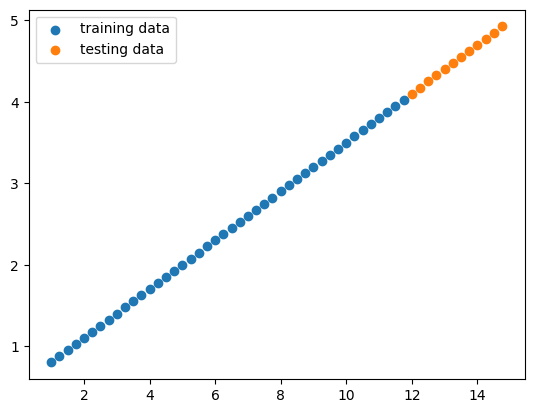

In [316]:
plt.scatter(X_train, Y_train, label='training data');
plt.scatter(X_test, Y_test, label='testing data');
plt.legend()

In [317]:
def plot_data(x_train=X_train, y_train=Y_train, x_test=X_test, y_test=Y_test, predictions=None):
    plt.scatter(X_train, Y_train, label='training data');
    plt.scatter(X_test, Y_test, label='testing data');
    if predictions is not None:
      plt.scatter(X_test, predictions, label = "predictions");
    plt.legend()

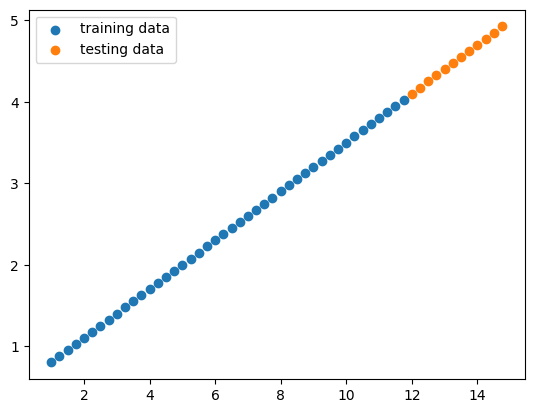

In [318]:
plot_data()

#### 3. Building the model

In [319]:
from torch import nn
class LinearModel(nn.Module): # nn.Module contains all building blocks for NN
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) # a kind of tensor that is considered as module parameter
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor: # X : input data, forward propagation
    return self.weights*x + self.bias

### PyTorch essential NN building Modules

 * torch.nn -> contains all buildings for computationl graphs/NN
 * torch.nn.Parameter -> what parameters sould our model try and learn, often a PyTorch layer from torch.nn will set these for us
 * torch.nn.Module -> the base class for all NN modules, if you subclass it, you should overwrite forward()
 * torch.optim -> this is where optimizers are defined(like Adam, RMS Prop)
 * def forward() - All nn.Module subclasses **require you to overwrite forward()**

### Checking contents for out PyTorch Model

To check our model's parameters, see using `.parameters()`

In [320]:
torch.manual_seed(10)

model1 = LinearModel()
model1

LinearModel()

In [321]:
list(model1.parameters())

[Parameter containing:
 tensor([-0.6014], requires_grad=True),
 Parameter containing:
 tensor([-1.0122], requires_grad=True)]

In [322]:
model1.state_dict()

OrderedDict([('weights', tensor([-0.6014])), ('bias', tensor([-1.0122]))])

### Making predictions using `torch.inference_mode()`


In [323]:
with torch.inference_mode(): # turns off gradient tracking -> while testing we dont need to calculate graidents
  y_preds = model1(X_test)

# or
with torch.no_grad():
  y_preds = model1(X_test) # less faster than inference mode
# or
# y_preds = model1(X_test) # gradient tracking is on
y_preds

tensor([[-8.2289],
        [-8.3793],
        [-8.5296],
        [-8.6800],
        [-8.8303],
        [-8.9807],
        [-9.1310],
        [-9.2814],
        [-9.4317],
        [-9.5821],
        [-9.7324],
        [-9.8828]])

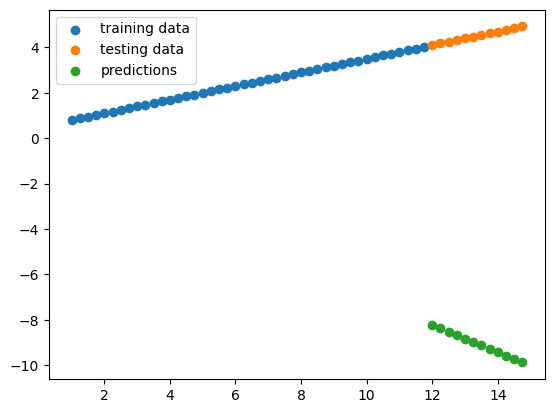

In [324]:
plot_data(predictions=y_preds)

### 3. Train the model

To train the model, we need:
* Loss function
* Optimizer

In [325]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(model1.parameters(), lr = 0.01) # pass model parameters and lr

#### Building a training and testing loop in PyTorch

1. Forward pass on data
2. Calculate the loss
3. Optimizer zero grad, set all parameters to have initial grad = 0/None
4. Call loss.backward() for backpropagation
5. Optimizer steps

In [326]:
epochs = 1000

for epoch in range(epochs):
  model1.train() # train mode in pytorch -> sets requires_grad = True

  y_preds = model1(X_train)
  loss = loss_function(y_preds, Y_train)

  if epoch == 500:
    optimizer = torch.optim.SGD(model1.parameters(), lr = 0.001) # changing the lr

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  if epoch % 100 == 0:
    print(f"Iteration : {epoch+1} | Training Loss : {loss:.2f}")

    # model1.eval()
    with torch.no_grad():
      model1.train()
      y_preds = model1(X_test)
      loss = loss_function(y_preds, Y_test)
      print(f"Iteration : {epoch} | Testing Loss : {loss:.2f}")

Iteration : 1 | Training Loss : 7.26
Iteration : 0 | Testing Loss : 12.71
Iteration : 101 | Training Loss : 0.39
Iteration : 100 | Testing Loss : 0.60
Iteration : 201 | Training Loss : 0.25
Iteration : 200 | Testing Loss : 0.38
Iteration : 301 | Training Loss : 0.31
Iteration : 300 | Testing Loss : 0.18
Iteration : 401 | Training Loss : 0.25
Iteration : 400 | Testing Loss : 0.14
Iteration : 501 | Training Loss : 0.37
Iteration : 500 | Testing Loss : 0.77
Iteration : 601 | Training Loss : 0.02
Iteration : 600 | Testing Loss : 0.03
Iteration : 701 | Training Loss : 0.01
Iteration : 700 | Testing Loss : 0.09
Iteration : 801 | Training Loss : 0.02
Iteration : 800 | Testing Loss : 0.06
Iteration : 901 | Training Loss : 0.01
Iteration : 900 | Testing Loss : 0.08


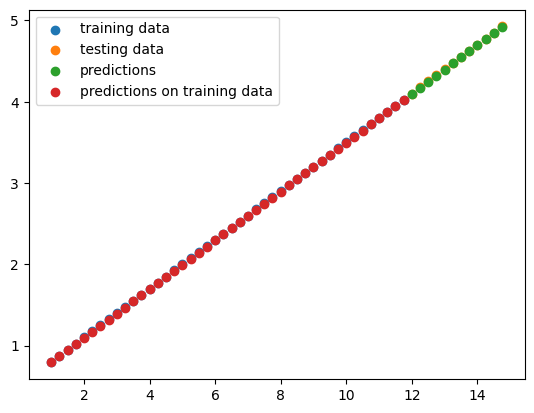

In [327]:
with torch.inference_mode():
  y_preds = model1(X_test)
plot_data(predictions=y_preds)

with torch.inference_mode():
  y_preds = model1(X_train)
plt.scatter(X_train, y_preds, label = 'predictions on training data')
plt.legend()